In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from matplotlib import pyplot
import pandas as pd
import pandas_datareader as pdr
import tensorflow
import keras
from keras.preprocessing import sequence
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
import time
from sklearn import neighbors
from sklearn.ensemble import RandomForestRegressor
from sklearn.utils import shuffle
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split, KFold, cross_val_score
from sklearn.svm import SVR, SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import itertools
from statsmodels.tsa.arima_model import ARIMA
import math
from pandas.plotting import lag_plot

In [2]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [3]:
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [4]:
import yfinance as yf
import datetime

ticker = 'ICICIBANK.NS'
start_date = datetime.datetime(2018, 1, 1)
end_date = datetime.datetime(2024, 4, 9)

df = yf.download(ticker, start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


In [5]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-01,314.000000,314.000000,309.100006,310.299988,302.940552,7739502
2018-01-02,310.950012,311.700012,307.500000,309.700012,302.354797,7046560
2018-01-03,312.500000,316.350006,312.500000,315.000000,307.529114,8898342
2018-01-04,314.950012,315.649994,311.500000,314.700012,307.236237,6385367
2018-01-05,314.450012,315.149994,311.600006,312.899994,305.478882,6366054
...,...,...,...,...,...,...
2024-04-02,1094.449951,1094.449951,1079.250000,1081.199951,1081.199951,14380396
2024-04-03,1075.000000,1083.650024,1072.250000,1077.199951,1077.199951,15477184
2024-04-04,1084.750000,1085.800049,1063.449951,1078.849976,1078.849976,21419689


In [6]:
df.shape

(1547, 6)

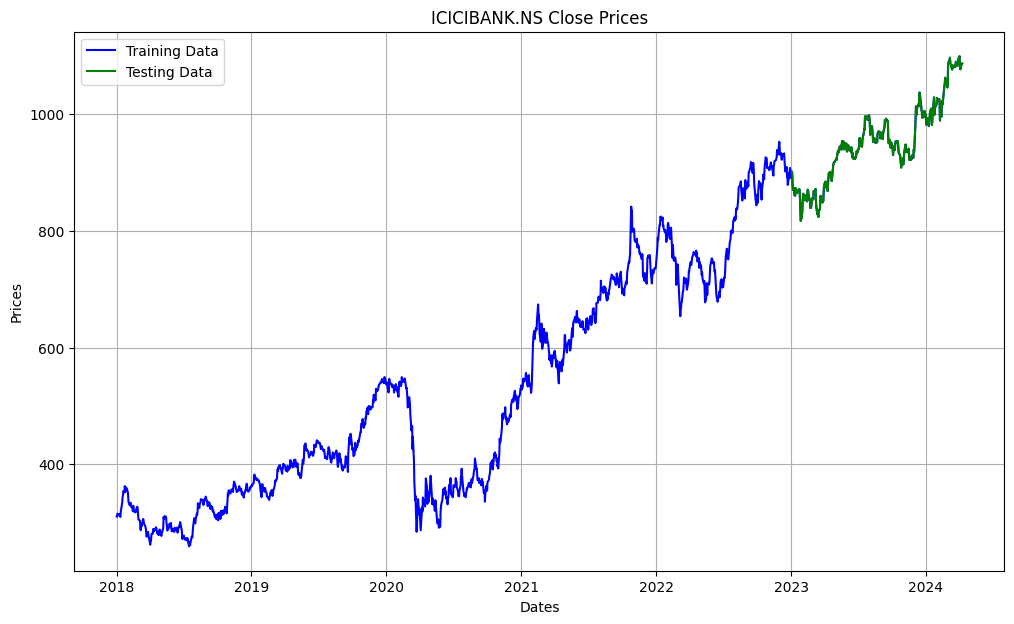

In [7]:
train_data, test_data = df[0:int(len(df)*0.8)], df[int(len(df)*0.8):]
plt.figure(figsize=(12,7))
plt.title(f'{ticker} Close Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(df['Close'], 'blue', label='Training Data')
plt.plot(test_data['Close'], 'green', label='Testing Data')
plt.grid(True)
plt.legend()

In [8]:
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200 / (np.abs(y_pred) + np.abs(y_true))))

# Assuming train_data and test_data are your datasets
train_ar = train_data['Close'].values
test_ar = test_data['Close'].values

history = [x for x in train_ar]
print(type(history))
predictions = list()

# SARIMA order
# ARIMA order (2, 0, 1)
# SARIMA seasonal order (adjust the seasonal component as needed)

for t in range(len(test_ar)):
    model = SARIMAX(history, order = (1, 1, 1), seasonal_order = (1, 1, 1, 12))
    model_fit = model.fit(disp=False, method='powell', maxiter=1000)
    output = model_fit.get_forecast(steps=1)
    yhat = output.predicted_mean[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)

<class 'list'>


In [10]:
error = mean_squared_error(test_ar, predictions)
print('Mean Squared Error: %.3f' % error)

error2 = smape_kun(test_ar, predictions)
print('Symmetric Mean Absolute Error: %.3f' % error2)

rmse = np.sqrt(mean_squared_error(test_ar, predictions))
mae = mean_absolute_error(test_ar, predictions)

print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)

# Calculate accuracy percentage
accuracy_percentage = 100 - error2
print("Accuracy Percentage:", accuracy_percentage)

Mean Squared Error: 92.830
Symmetric Mean Absolute Error: 0.737
Root Mean Squared Error: 9.634853138037316
Mean Absolute Error: 6.990251874191736
Accuracy Percentage: 99.26273361115507


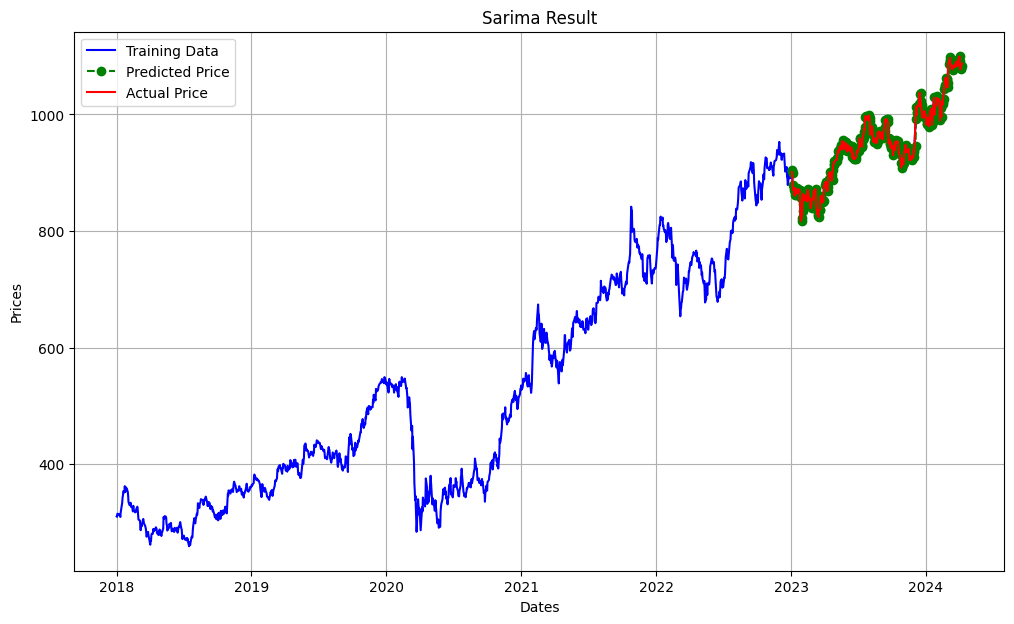

In [11]:
plt.figure(figsize=(12,7))
plt.plot(df['Close'],'green', color='blue', label='Training Data')
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed',
         label='Predicted Price')
plt.plot(test_data.index, test_data['Close'], color='red', label='Actual Price')
plt.title('Sarima Result')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.grid(True)
plt.savefig(f'sarima_{ticker}.png')
plt.legend()

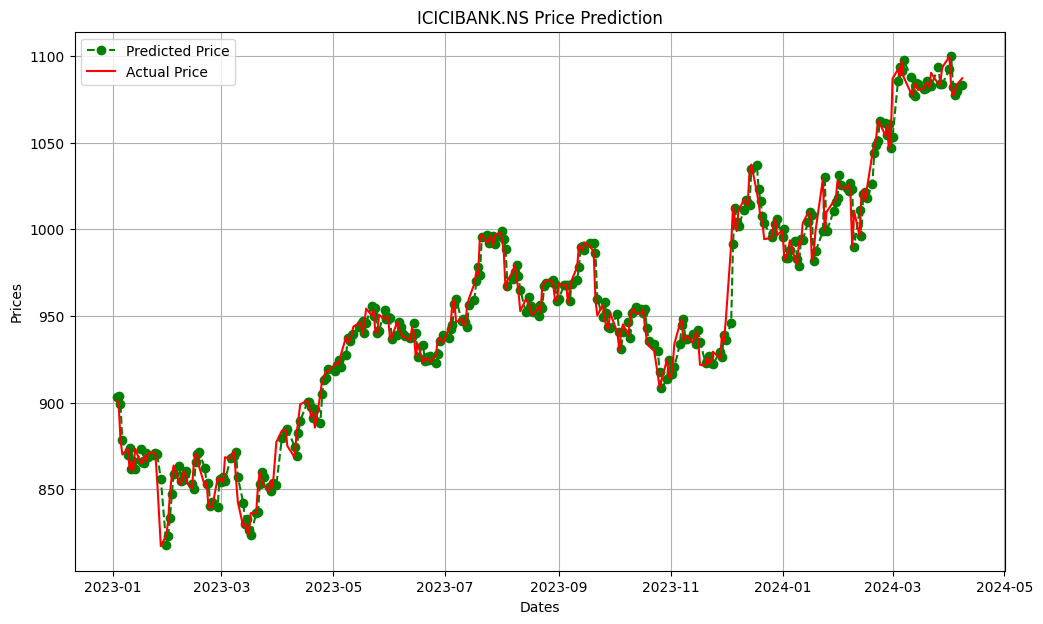

In [12]:
plt.figure(figsize=(12,7))
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed',
         label='Predicted Price')
plt.plot(test_data.index, test_data['Close'], color='red', label='Actual Price')
plt.title(f'{ticker} Price Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.grid(True)
plt.legend()

In [13]:
actual=pd.DataFrame()
actual=pd.DataFrame(test_ar,columns=["Actual"])
predicted=pd.DataFrame(list(predictions),columns=["Predicted"])
actual=actual.reset_index(drop=True)
predicted=predicted.reset_index(drop=True)
output=pd.concat([actual,predicted],axis=1)
print(output.tail(10))

          Actual    Predicted
300  1090.300049  1082.945422
301  1083.699951  1093.405403
302  1083.750000  1084.088557
303  1093.300049  1083.574192
304  1099.650024  1092.382716
305  1081.199951  1099.863710
306  1077.199951  1082.011961
307  1078.849976  1077.269345
308  1083.400024  1079.759701
309  1087.150024  1083.404012


<h1><b>Getting Predictions for 60 days from now<b></h1>

In [19]:
import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Assuming train_data and test_data are your datasets
train_ar = train_data['Close'].values
test_ar = test_data['Close'].values

# SARIMA order
order = (1, 1, 1)  # Non-seasonal order (p, d, q)
seasonal_order = (1, 1, 1, 12)  # Seasonal order (P, D, Q, s)

# Using the entire dataset to train the SARIMA model
model = SARIMAX(test_ar, order=order, seasonal_order=seasonal_order)
model_fit = model.fit(disp=False)

# Forecasting 60 days ahead
forecast_steps = 60
forecast = model_fit.get_forecast(steps=forecast_steps)
predicted_values_60_days = forecast.predicted_mean

# Creating a date range for the next 60 days
forecast_dates = pd.date_range(start=df.index[-1], periods=61, freq='B')[1:]  # Assuming daily frequency, excluding today

# Creating a DataFrame with dates and predicted values
predicted_df_sarima = pd.DataFrame({'Date': forecast_dates, 'Predicted_Close': predicted_values_60_days})

# Save the DataFrame to a CSV file with the ticker name
csv_filename_sarima = f'pred.sarima.{ticker}.csv'
predicted_df_sarima.to_csv(csv_filename_sarima, index=False)

# Printing the DataFrame
print(predicted_df_sarima)

         Date  Predicted_Close
0  2024-04-09      1091.165589
1  2024-04-10      1088.682195
2  2024-04-11      1089.870772
3  2024-04-12      1094.796260
4  2024-04-15      1097.066141
5  2024-04-16      1098.098146
6  2024-04-17      1096.065382
7  2024-04-18      1093.051536
8  2024-04-19      1093.495310
9  2024-04-22      1095.681425
10 2024-04-23      1093.015263
11 2024-04-24      1096.578059
12 2024-04-25      1100.656948
13 2024-04-26      1098.152732
14 2024-04-29      1099.382228
15 2024-04-30      1104.249670
16 2024-05-01      1106.508893
17 2024-05-02      1107.582845
18 2024-05-03      1105.591450
19 2024-05-06      1102.501454
20 2024-05-07      1102.923308
21 2024-05-08      1105.106778
22 2024-05-09      1102.476214
23 2024-05-10      1106.039933
24 2024-05-13      1110.118509
25 2024-05-14      1107.614396
26 2024-05-15      1108.843690
27 2024-05-16      1113.711418
28 2024-05-17      1115.970694
29 2024-05-20      1117.044439
30 2024-05-21      1115.052840
31 2024-

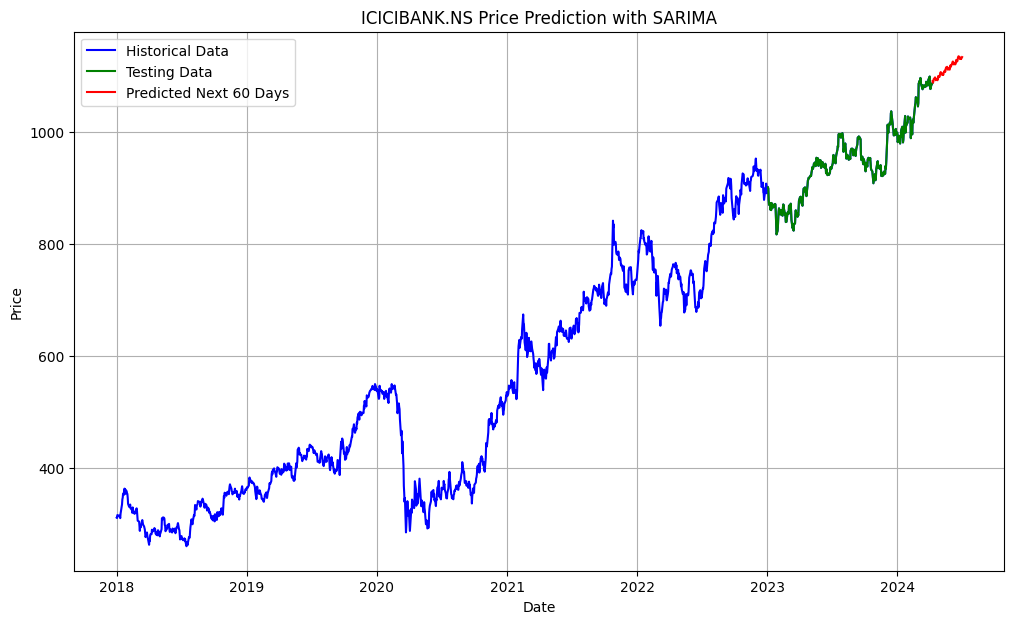

In [20]:
# Creating a DataFrame with dates and predicted values
predicted_df_sarima = pd.DataFrame({'Date': forecast_dates, 'Predicted_Close': predicted_values_60_days})

# Plotting the overall data
plt.figure(figsize=(12, 7))
plt.plot(df.index, df['Close'], label='Historical Data', color='blue')
plt.plot(test_data.index, test_data['Close'], label='Testing Data', color='green')
plt.plot(predicted_df_sarima['Date'], predicted_df_sarima['Predicted_Close'], label='Predicted Next 60 Days', color='red')

# Adding titles and labels
plt.title(f'{ticker} Price Prediction with SARIMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.savefig(f'prediction.sarima_{ticker}.png')
plt.show()